In [7]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X,2)*100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 74 131]
 [ 78  27]
 [ 73 229]
 [154 118]
 [126 225]
 [140 138]
 [ 38  93]
 [ 62 112]
 [ 96 199]
 [165  39]
 [174  93]
 [ 61  12]
 [128 112]
 [223  73]
 [ 15 173]
 [172 133]
 [154  98]
 [121  33]
 [115  75]
 [ 43 112]
 [101  34]
 [ 50 152]
 [132 111]
 [136 107]
 [202 159]
 [109  42]
 [240 202]
 [ 56   7]
 [ 26  62]
 [192 146]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [9]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y),1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X,y_new),axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1','Fitur 2','Label']

# Buat Data Frame
df = pd.DataFrame(data,columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,74,131,0
1,78,27,0
2,73,229,0
3,154,118,0
4,126,225,0


In [11]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,74,131,Kelas B
1,78,27,Kelas B
2,73,229,Kelas B
3,154,118,Kelas B
4,126,225,Kelas B


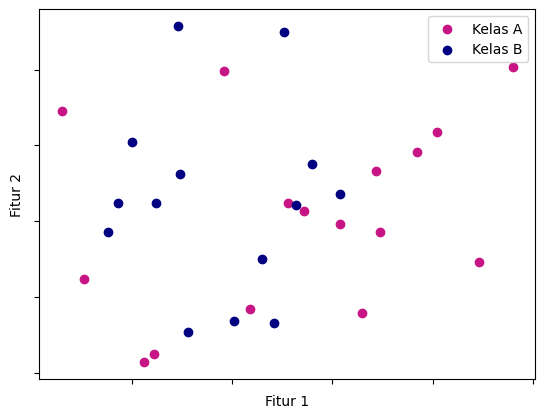

In [19]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group(('Kelas A',))
class_b = gb.get_group(('Kelas B',))


# Plot
plt.scatter(x=class_a['Fitur 1'],y=class_a['Fitur 2'],c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'],y=class_b['Fitur 2'],c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A','Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [25]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.7777777777777778
